# Thinking about Optimization

CPSC 340: Machine Learning and Data Mining

The University of British Columbia

2017 Winter Term 2

Mike Gelbart


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Optimization: introduction

#### definition

- An "optimization problem" refers to maximizing or minimizing a function. 
- There are many, many types of optimization problems.

$$ \displaystyle \min_x \, (x-a)^2+b $$



Interpretation: minimize the function $f(x)=(x-a)^2+b$ with respect to $x$ and return the minimum value. So in this case 


$$f^\star = \displaystyle \min_x \, (x-a)^2+b $$

#### minimizer vs. minimum

- Sometimes you are also interested in the **minimizer** rather than the **minimum** (plural **minima**). This is written as

$$x^\star = \displaystyle \arg \min_x \, (x-a)^2+b $$

#### maximization vs. minimization

The same goes for **maximizer** and **maximum** and $f^* = \max\,f(x)$ and $x^* = \arg \max\,f(x)$.

- The thing being maximized/minimized is called the **objective function**. Sometimes (primarily when minimizing) it's also called the **loss function** or **cost function**.

- Sometimes the result is not defined:

$$ \displaystyle \max_x \, (x-a)^2+b $$

is $\infty$. And

$$ \displaystyle \arg \max_x \, (x-a)^2+b $$

is undefined. 

#### dimensionalities

- The function you are optimizing should be a scalar-valued function, but the inputs need not be scalar-valued. For example:

$$ \min_\mathbf{x}\; ||\mathbf{x}||^2_2 $$

is a reasonable thing to write, as is

$$ \min_{x,y} \; xy^2 + x^2 + |x-y| $$

#### Continuous vs. discrete

- Some optimization problems are **continuous** and others are **discrete**. In CPSC 340 we will only consider continuous optimization. But you probably saw discrete optimization a lot in CPSC 221 (e.g., dynamic programming, shortest path in a graph).

#### How does this relate to CPSC 340 so far?

Question: what optimization problems have we seen in this course so far? Can we describe them?

<br><br><br><br><br><br>

- decision trees: find the best tree
  - a mix of continuous (thresholds) and discrete (split features and leaf predictions)
- KNN: find the closest neighbour
  - discrete
  - this happens at the `predict` stage, which is unusual. We usually talk about optimization during `fit`.
- Naive Bayes 
  - not explicitly, but I did say we were doing something called "maximum likelihood"
  - we were maximizing something, but the answer was easy to just write down
- $k$-means: both steps are optimization
  - cluster assignment step is discrete optimization
  - updating the means doesn't feel like optimization but we were actually minimizing a loss (see a2!)
- the rest of the course: A LOT of optimization
  - almost entirely continuous

#### Domains

- An optimization problem may come with a domain. In the examples above, we've assumed $x\in\mathbb{R}^d$. But sometimes we restrict ourselves. For example $x\geq 0$, etc. 

- These are sometimes also called "bounds". Like $0\leq x \leq 1$ means $x$ is bounded below by 0 and bounded above by 1.

- Note: you'll always see things like $x\geq 0$ and never $x>0$. Why? Consider this

$$\displaystyle \min_x \, x \quad \textrm{s.t.} \quad x>0$$

What's the solution?

  - BTW "s.t." means "such that". Or maybe "subject to". Depending on your mood.
  
#### Constraints: introduction

- An optimization problem may come with one or more **constraints** (but, for the purposes of this course, only one objective! If you've seen pareto fronts in economics class, that's a multi-objective situation).

- Example:

$$ \displaystyle \min_x (x-a)^2+b \quad \textrm{s.t.} \quad \sin(x) \leq 0.5$$

- If you want, you can think of bounds/domains as a special case of constraints. 

- The above is called an **inequality constraint**. Another type of constraint an an **equality constraint**. For example: 


$$ \displaystyle \min_x (x-a)^2+b \quad \textrm{s.t.} \quad \sin(x) = 0.5$$

These are very different beasts!!! Roughly speaking,

- equality constraints tend to reduce the dimensionality of the search space (restricting us to a subspace)
- inequality constraints typically do not reduce the dimensionality but just cut the space "in half"

Example:  $\min_x \; \sin(x) \; \textrm{s.t.} \sin(x)\geq 0.5$

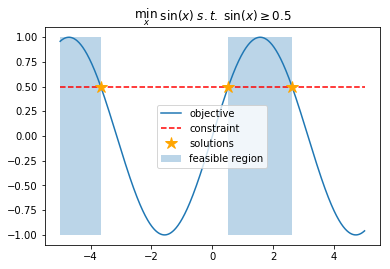

In [2]:
x = np.linspace(-5,5,1000)
y = np.sin(x)
plt.plot(x, y, label="objective")
plt.plot(x, 0*x+0.5, color="r", linestyle="--", label="constraint")
plt.fill_between(x, -1, 1, where=y>=0.5, label="feasible region", alpha=0.3)
plt.plot([-7*np.pi/6, np.pi/6, 5*np.pi/6], 0.5+np.zeros(3), '*', color="orange", markersize=12, label="solutions")
plt.legend()
plt.title("$\min_x \; \sin(x) \; s.t. \; \sin(x)\geq 0.5$")
plt.show()

We won't deal with constraints much in this course. Mainly just when we talk about non-negative matrix factorization (you guessed it, we'll have non-negativity constraints of the form $x_i\geq 0$).

#### Convex functions

- There is a mathematical definition. You can [read about it here](https://en.wikipedia.org/wiki/Convex_function).

- For our purposes, the key is for convex functions is that a local minimum is also a global minimum.

- (optional note) convex --> all local minima are global minima; but non-convex -/-> there exists local minima that are not global minima

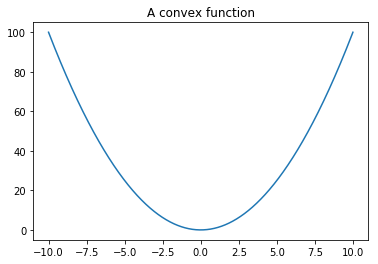

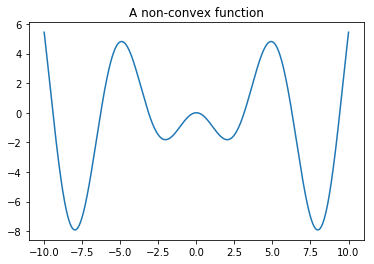

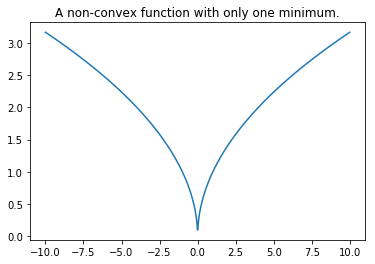

In [3]:
x = np.linspace(-10,10,1000)
plt.plot(x,x**2)
plt.title("A convex function")
plt.show()

plt.figure()
plt.plot(x, -x*np.sin(x))
plt.title("A non-convex function")
plt.show()

plt.figure()
plt.plot(x, np.sqrt(np.abs(x)))
plt.title("A non-convex function with only one minimum.")
plt.show()

#### why do we care about convexity

- from a machine learning point of view, optimization is often the hard part and very often the time-consuming part. 
- much better methods exist for convex functions than non-convex ones
- also, when you've reached a local minimum you can stop.

See the posted notes for more on convexity, and for how to check if a function is convex.

#### How do we solve (continuous) optimization problems?

- From calculus we were told that to find the min/max of a function, take the derivative and set to 0
- So what's the big deal?
- The big deal is that "derivative=0" is an equation **we cannot solve most equations**!!! 
 - (I feel like high school gives the wrong impression about this...)

Here's one: 

$$\sin(\cos(x))+999\log{x}=\sqrt{x}$$

I just made that up and it might not make any sense, but the point is for it to look weird. Can we solve this? No. We cannot solve equations in closed form, in general. This is true for one variable ($x\in\mathbb{R}$) and more than one variable ($x \in \mathbb{R}^d,\;d>1$). So we solve equations with _iterative methods_. (Remember Newton's method?) 

There's an entire field of study related to different such methods. Different methods work well for different classes of functions. And even "works well" needs to be defined carefully, but roughly it means "gets to a/the solution quickly".


So, yes, there is a mapping from optimization to solving equations, but we're not done because

1. solving equations is hard
2. even if we find points where the derivative (gradient) is zero, if the loss is non-convex we need to worry about local minima, saddle points (maxima are less of a problem)



#### Finally, an aside on min/max... we use them in 3 ways:

| In words  |  In math notation  |  Output type  |  In Python |
|-----------|-----------|---------------|------------|
| maximizing a function over its domain | $\max_x f(x)$ | same type as $x$ (a number, a vector, ...) | `scipy.optimize.minimize` |
| selecting the largest element from a set | $\max(\{a,b\})$ | a number | `np.max` |
| a function given by the max of two other functions | $\max(f(x),g(x))$ | a **function** | `np.maximum` | 

Case (3) seems to confuse a lot of students. Here are some examples...

In [5]:
# case 2
x = [9,-34,100,7]
print(np.max(x))
print(np.argmax(x))

2

In [6]:
np.maximum(x) # error

ValueError: invalid number of arguments

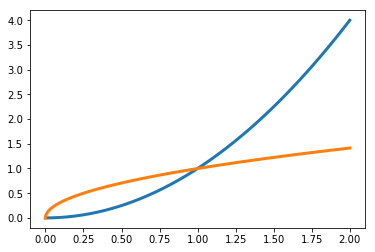

In [7]:
x = np.linspace(0,2,1000)
f = lambda z: z**2
g = lambda z: np.sqrt(z)
plt.plot(x,f(x), linewidth=3)
plt.plot(x,g(x), linewidth=3);

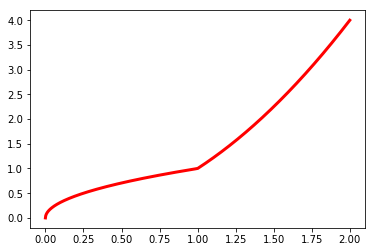

In [8]:
plt.plot(x, np.maximum(f(x),g(x)), linewidth=3, color='red');

In [ ]:
np.max(f(x),g(x)) # error

We can use `np.max` to give us the same result if we operate on scalars (if this is confusing, just ignore it):

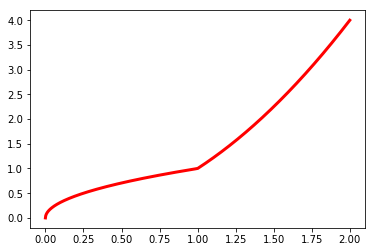

In [10]:
def h(z):
    return np.max((f(z),g(z)))

plt.plot(x,[h(x_i) for x_i in x], linewidth=3, color="red");

In this course we'll see functions like $\max(0,x)$. Here, the $0$ can be interpreted as a function of $x$ if you find that helpful. This function looks like:

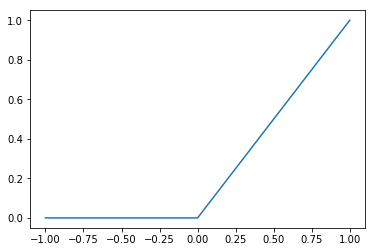

In [13]:
x = np.linspace(-1,1,1000)
plt.plot(x, np.maximum(0, x));

And finally case 1 in Python:

In [14]:
from scipy.optimize import minimize

$\min_x (x-5)^2+3$

In [15]:
result = minimize(lambda x: (x-5)**2+3, np.random.rand())
print("min =", result.fun)
print("arg min =", result.x)

min = 3.0
arg min = [ 5.00000001]


And we can do the same if $x$ is a vector...

In [16]:
result = minimize(lambda x: np.linalg.norm(x-5)+3, np.random.rand(5))
print("min =", result.fun)
print("arg min =", result.x)

min = 3.0000000172317196
arg min = [ 4.99999999  4.99999999  4.99999999  4.99999999  4.99999999]


## Summary

- TODO